# Practical Costs

### Classes and modules

In [2]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
import datetime
from IPython.display import display
import copy

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

import pycuda.driver as cuda

In [3]:
source_path = "/home/florianb/havvarsel/multilevelDA/doublejet/scripts/PracticalCost/2023-09-18T12_54_47"

In [4]:
def raw2costs(filename):
    rawCosts = np.load(source_path+"/"+filename)
    return np.mean(np.sort(rawCosts)[:,2:-2], axis=1)

In [5]:
def raw2costsEnsemble(filename):
    rawCosts = np.load(source_path+"/"+filename)
    return np.mean(np.sort(rawCosts), axis=1)

In [6]:
costsPure = raw2costs("costsPure.npy")

In [7]:
costsPartnered = raw2costs("costsPartnered.npy")

In [8]:
costsPure, costsPartnered

(array([0.33712952, 0.48696315, 1.14491088, 7.19872307]),
 array([0.        , 0.86147594, 1.44573414, 8.37186163]))

In [10]:
ls = [6,7,8,9]

([<matplotlib.axis.XTick at 0x7fd28800bed0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

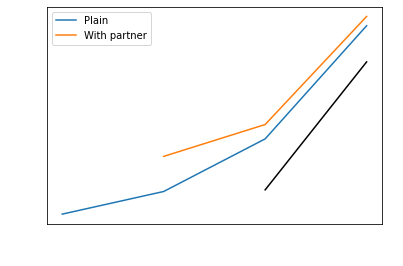

In [12]:
plt.loglog(2*2**np.array(ls),costsPure, label="Plain", c="C0")
plt.loglog(2*2**np.array(ls)[1:],costsPartnered[1:], label="With partner", c="C1")
plt.loglog(2*2**np.array(ls)[-2:], [4/8,4], c="black")
plt.xlabel("Grid cells")
plt.ylabel("Costs in Practise")
plt.legend(labelcolor="black")
plt.xticks(2*2**np.array(ls))

In [22]:
np.savetxt(source_path+"/costsTable.txt" , np.vstack([2*2**np.array(ls),costsPureEnsemble, costsPartneredEnsemble]).T,
            delimiter=",", header="grid_cells, costs_pure, costs_partnered",
            fmt="%10.5f")